### Likelihood Method

1)

$\int_{0}^{T} N_{0} (1+P \sin{(\omega t + \phi)}) \text{dt} \approx N_{0} T \overset{\mathrm{!}}{=} 1$

$\Rightarrow N_{0} = \frac{1}{T}$

2)

$\mathcal{l} = \text{ln}(N_{0}) + \text{ln}(1+P \sin{(\omega t + \phi)})$

$\Rightarrow \frac{\delta \mathcal{l}}{\delta \omega} = \frac{P t \cos{(\omega t + \phi)}}{1+P \sin{(\omega t + \phi)}}$

$\Rightarrow \frac{\delta^{2} \mathcal{l}}{\delta \omega^{2}} = \frac{-P t^{2} \sin{(\omega t + \phi)}(1+P \sin{(\omega t + \phi)})-P^{2} t^{2} \cos^{2}{(\omega t + \phi)}}{(1+P \sin{(\omega t + \phi)})^{2}} $

$\left \langle \frac{\delta^{2} \mathcal{l}}{\delta \omega^{2}} \right \rangle = \int_{0}^{T} \left( \frac{\delta^{2} \mathcal{l}}{\delta \omega^{2}} \right) \cdot \frac{N}{T} (1+P \sin{(\omega t + \phi)}) \text{dt} = \frac{N}{T} \int_{0}^{T} (-P^{2}t^{2} - P t^{2} \sin{(\omega t + \phi)}) \cdot (1-P\sin{(\omega t + \phi)}) \text{dt}$

$\Rightarrow \left \langle \frac{\delta^{2} \mathcal{l}}{\delta \omega^{2}} \right \rangle = - \frac{NP^{2}T^{2}}{6}$

Analogous calculation yields: 

$\left \langle \frac{\delta^{2} \mathcal{l}}{\delta \omega \delta \phi} \right \rangle = \left \langle \frac{\delta^{2} \mathcal{l}}{\delta \phi \delta \omega} \right \rangle = \frac{NP^{2}T}{4}$ $\hspace{1cm}$ and $\hspace{1cm}$ $\left \langle \frac{\delta^{2} \mathcal{l}}{\delta \phi^{2}} \right \rangle = \frac{NP^{2}}{2}$

$\Rightarrow \text{cov}(\omega, \phi, P)  = \left(\begin{array}{cc} 
\frac{24}{NP^{2}T^{2}} & -\frac{12}{NP^{2}T} \\
-\frac{12}{NP^{2}T} & \frac{8}{NP^{2}} \\
\end{array}\right)$

3)

In this case the error on $\omega$ is just given by the upper left entry of the inverse of the covariance matrix. In result:

$\sigma^{2}_{\omega} = \frac{6}{NP^{2}T^{2}}$

This means that the error is a factor 2 smaller compared to the case where the phase was unknown.

4)

Calculate $\left \langle \frac{\delta^{2} \mathcal{l}}{\delta P \delta \omega} \right \rangle = \left \langle \frac{\delta^{2} \mathcal{l}}{\delta \omega \delta P} \right \rangle$, $\left \langle \frac{\delta^{2} \mathcal{l}}{\delta P \delta \phi} \right \rangle = \left \langle \frac{\delta^{2} \mathcal{l}}{\delta \phi \delta P} \right \rangle$ and $\left \langle \frac{\delta^{2} \mathcal{l}}{\delta P^{2}} \right \rangle$:

$\text{cov}^{-1}(\omega, \phi, P) = - \left \langle \frac{\delta^{2} \mathcal{l}}{\delta \alpha_{i}\delta \alpha_{j}} \right \rangle = \left(\begin{array}{ccc} 
\frac{NP^{2}T^{2}}{6} & \frac{NP^{2}T}{4} & 0\\
\frac{NP^{2}T}{4} & \frac{NP^{2}}{2} & 0 \\
0 & 0 & \frac{N}{2}
\end{array}\right)$

$\Rightarrow \text{cov}(\omega, \phi, P) = - \left \langle \frac{\delta^{2} \mathcal{l}}{\delta \alpha_{i}\delta \alpha_{j}} \right \rangle = \left(\begin{array}{ccc} 
\frac{24}{NP^{2}T^{2}} & -\frac{12}{NP^{2}T} & 0\\
-\frac{12}{NP^{2}T} & \frac{8}{NP^{2}} & 0 \\
0 & 0 & \frac{2}{N}
\end{array}\right)$

### Parameter Estimation: Least Square Method

1)

$\chi^{2} = \sum_{i} \frac{(y_{i}-c)^{2}}{\sigma_{i}^{2}}$

$\Rightarrow \frac{\delta \chi^{2}}{\delta c} = 2 \sum_{i} \frac{(y_{i}-c)}{\sigma_{i}^{2}} \overset{\mathrm{!}}{=} 0$

$\Rightarrow c = \frac{\sum_{i} \frac{y_{i}}{\sigma_{i}^{2}}}{\sum_{i} \frac{1}{\sigma_{i}^{2}}} = 3.20$

2)

Error Propagation:

$\frac{1}{\sigma^{2}_{c}} = \sum_{i} \frac{1}{\sigma^{2}_{i}}$

$\Rightarrow \sigma_{c} = 0.08$

3)

$\chi^{2} = \sum_{i} \frac{(y_{i}-c)^{2}}{\sigma_{i}^{2}} = 7.78$

4)

In [42]:
from scipy import optimize

import numpy             as np
import matplotlib.pyplot as plt

In [47]:
def f(x,c):
    return c

y  =[3.4,2.8,3.2,3.7]
ey =[0.2,0.2,0.1,0.3]
x  =[1,2,3,4]


In [48]:
popt , pcov = optimize.curve_fit(f, x, y, sigma = ey, absolute_sigma=True)
a = np.zeros(4)
a.fill(popt[0])
chi2        = sum (((y-a)/ey)** 2)

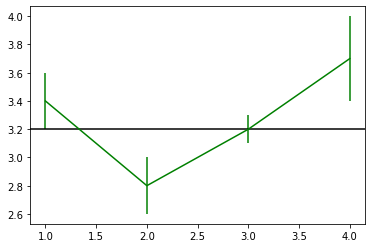

In [49]:
plt.errorbar(      x,  y,   yerr = ey, color = 'green')
plt.axhline( popt[0],                  color = 'black')

In [50]:
print("1. xavg =", popt[0] ," +/-", np.sqrt(pcov[0,0]) )
print("2. chi2 =", chi2)

1. xavg = 3.203448274463579  +/- 0.07878385993435032
2. chi2 = 7.775862068965522
